In [33]:
import json
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl
from sklearn.metrics import roc_curve, auc
from scipy import stats

In [34]:
non_perturbed_dataset = 'standard'
datasets = [
    'rotated'
] 
noise_pcts = [10,20,30,40,50,60,70,80,90,95,96,97,98,99,100]
noise_pcts = [10,20,30,40,50,60,70,80,90,100]
FONT_SIZE=14
TICK_FONT_SIZE=14
mpl.rcParams['xtick.labelsize'] = TICK_FONT_SIZE
mpl.rcParams['ytick.labelsize'] = TICK_FONT_SIZE

In [35]:
def get_baseline_results(method, dataset, data_size='small', unstructured=False, unstruc_acc='unstructured_test_accuracy'):
    if unstructured:
        struc_unstruc_acc = unstruc_acc
    else:
        struc_unstruc_acc = 'structured_test_accuracy'
    # need to build array of results for noise pcts
    acc = []
    acc_stds = []
    
    # get standard
    np_0 = json.loads(open('../'+method+'/'+data_size+'/standard.json').read())
    acc.append(np_0['noise_pct_0'][struc_unstruc_acc]['mean'])
    acc_stds.append(np_0['noise_pct_0'][struc_unstruc_acc]['std_err'])
    
    # other noise pcts
    np_res = json.loads(open('../'+method+'/'+data_size+'/'+dataset+'.json').read())
    for n in noise_pcts:
        acc.append(np_res['noise_pct_'+str(n)][struc_unstruc_acc]['mean'])
        acc_stds.append(np_res['noise_pct_'+str(n)][struc_unstruc_acc]['std_err'])
    return acc, acc_stds

In [36]:
def get_baseline_high_results(method, dataset, data_size='small', unstructured=False, unstruc_acc='unstructured_test_accuracy'):
    if unstructured:
        struc_unstruc_acc = unstruc_acc
    else:
        struc_unstruc_acc = 'structured_test_accuracy'
    # need to build array of results for noise pcts
    acc = []
    acc_stds = []
    
    # other noise pcts
    np_res = json.loads(open('../'+method+'/'+data_size+'/'+dataset+'.json').read())
    for n in noise_pcts:
        if n > 90:
            acc.append(np_res['noise_pct_'+str(n)][struc_unstruc_acc]['mean'])
            acc_stds.append(np_res['noise_pct_'+str(n)][struc_unstruc_acc]['std_err'])
    return acc, acc_stds

In [37]:
def get_nsl_results(net_type, dataset, unstructured=False, unstruc_acc='accuracy', without_problog=False):
    if unstructured:
        struc_unstruc = 'unstructured_test_data'
        if without_problog:
            struc_unstruc = struc_unstruc+'/without_problog'
        acc_metric = unstruc_acc
    else:
        struc_unstruc = 'structured_test_data'
        acc_metric = 'accuracy'
        
    # need to build array of results for noise pcts
    acc = []
    acc_stds = []
    
    # get standard
    np_0 = json.loads(open('../nsl/'+struc_unstruc+'/'+net_type+'/standard.json').read())
    acc.append(np_0['noise_pct_0'][acc_metric]['mean'])
    acc_stds.append(np_0['noise_pct_0'][acc_metric]['std_err'])
    
    # other noise pcts
    np_res = json.loads(open('../nsl/'+struc_unstruc+'/'+net_type+'/'+dataset+'.json').read())    
    for n in noise_pcts:
        acc.append(np_res['noise_pct_'+str(n)][acc_metric]['mean'])
        acc_stds.append(np_res['noise_pct_'+str(n)][acc_metric]['std_err'])
    return acc, acc_stds


In [38]:
def get_nsl_high_results(net_type, dataset, unstructured=False, unstruc_acc='accuracy'):
    if unstructured:
        struc_unstruc = 'unstructured_test_data'
        acc_metric = unstruc_acc
    else:
        struc_unstruc = 'structured_test_data'
        acc_metric = 'accuracy'
        
    # need to build array of results for noise pcts
    acc = []
    acc_stds = []
        
    # other noise pcts
    np_res = json.loads(open('../nsl/'+struc_unstruc+'/'+net_type+'/'+dataset+'.json').read())    
    for n in noise_pcts:
        if n > 90:
            acc.append(np_res['noise_pct_'+str(n)][acc_metric]['mean'])
            acc_stds.append(np_res['noise_pct_'+str(n)][acc_metric]['std_err'])
    return acc, acc_stds


In [39]:
def get_pct_symbolic_perturbs(net_type, deck):
    def format_pct(x):
        return math.floor(x*100)
    pcts = []
    # get standard
    std_perturbs = json.loads(open('../mislabelled_example_analysis/'+net_type+'/standard.json').read())
    pcts.append(format_pct(std_perturbs['noise_pct_0']['pct_incorrect_examples']))
    pct_symbolic_perturbs = json.loads(open('../mislabelled_example_analysis/'+net_type+'/'+deck+'.json').read())
    for n in noise_pcts:
        pcts.append(format_pct(pct_symbolic_perturbs['noise_pct_'+str(n)]['pct_incorrect_examples']))
    return pcts

# Stuctured Test Data

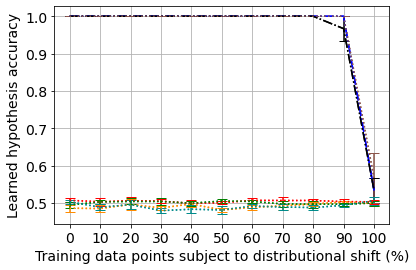

In [40]:
fig, ax = plt.subplots()
nps_x = [0]+noise_pcts
for i in range(1):
    # NSL
    nsl_acc, nsl_err = get_nsl_results('softmax', datasets[i])
    ax.plot(nps_x, nsl_acc, label = "FFNSL Softmax 320 examples", color="b", linestyle='-.')
    ax.errorbar(nps_x, nsl_acc, yerr=nsl_err, color="b", capsize=5,linestyle='-.')
    
    nsl_acc, nsl_err = get_nsl_results('edl_gen', datasets[i])
    ax.plot(nps_x, nsl_acc, label = "FFNSL EDL-GEN 320 examples", color="k", linestyle='-.')
    ax.errorbar(nps_x, nsl_acc, yerr=nsl_err, color="k", capsize=5,linestyle='-.')
    
    # Random Forest Small
    rf_acc, rf_err = get_baseline_results('rf', datasets[i])
    ax.plot(nps_x, rf_acc, label = "Baseline RF 320 examples", color="r", linestyle=':')
    ax.errorbar(nps_x, rf_acc, yerr=rf_err, color="r", capsize=5, linestyle=':')
    
    # Random Forest Large
    rf_acc, rf_err = get_baseline_results('rf', datasets[i], data_size='large')
    ax.plot(nps_x, rf_acc, label = "Baseline RF 32,000 examples", color="darkorange", linestyle=':')
    ax.errorbar(nps_x, rf_acc, yerr=rf_err, color="darkorange", capsize=5, linestyle=':')
    
    # RF Background Knowledge - same row, same col, same block predicates
    rf_acc, rf_err = get_baseline_results('rf_with_knowledge', datasets[i], data_size='small')
    ax.plot(nps_x, rf_acc, label = "Baseline RF (with knowledge) 320 examples", color="tab:brown", linestyle=':')
    ax.errorbar(nps_x, rf_acc, yerr=rf_err, color="tab:brown", capsize=5, linestyle=':')
    
    # CNN LSTM Small
    fcn_acc, fcn_err = get_baseline_results('cnn_lstm', datasets[i])
    ax.plot(nps_x, fcn_acc, label = "Baseline CNN-LSTM 320 examples", color="g", linestyle=':')
    ax.errorbar(nps_x, fcn_acc, yerr=fcn_err, color="g", capsize=5, linestyle=':')
    
    # CNN LSTM Large
    fcn_acc, fcn_err = get_baseline_results('cnn_lstm', datasets[i], data_size='large')
    ax.plot(nps_x, fcn_acc, label = "Baseline CNN-LSTM 32,000 examples", color="darkcyan", linestyle=':')
    ax.errorbar(nps_x, fcn_acc, yerr=fcn_err, color="darkcyan", capsize=5, linestyle=':')
    
    
#     # RF Background Knowledge 2 - Encoding row,col,block IDs
#     rf_acc, rf_err = get_baseline_results('rf_with_knowledge_2', datasets[i], data_size='small')
#     axes[i].plot(nps_x, rf_acc, label = "Baseline RF (with knowledge 2) 320 examples", color="tab:orange", linestyle=':')
#     axes[i].errorbar(nps_x, rf_acc, yerr=rf_err, color="tab:orange", capsize=5, linestyle=':')
    
    # Twin Axes to denote pct symbolic perturbations
#     pct_symbolic_perturbs_softmax = get_pct_symbolic_perturbs('softmax', datasets[i])
#     pct_symbolic_perturbs_edl_gen = get_pct_symbolic_perturbs('edl_gen', datasets[i])
#     ax2 = ax.twiny()
    
    ax.set_xticks(nps_x)
    #ax.set_yticks(np.arange(0.45,1.01,0.05))
    ax.set_xlabel('Training data points subject to distributional shift (%)', fontsize=FONT_SIZE)
    ax.set_ylabel('Learned hypothesis accuracy', fontsize=FONT_SIZE)
#     ax.set_title(datasets[i])
    ax.grid(True)
    legend = ax.legend(bbox_to_anchor=(1.05, 1.25), fontsize=9,ncol=3, borderaxespad=0, )

    def export_legend(legend, filename="sudoku_9x9_legend.pdf", expand=[-5,-5,5,5]):
        fig  = legend.figure
        fig.canvas.draw()
        bbox  = legend.get_window_extent()
        bbox = bbox.from_extents(*(bbox.extents + np.array(expand)))
        bbox = bbox.transformed(fig.dpi_scale_trans.inverted())
        fig.savefig(filename, dpi="figure", bbox_inches=bbox, format='pdf')
    
#     ax2.set_xticks(nps_x)
#     ax2.set_xticklabels(pct_symbolic_perturbs_softmax)
#     ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
#     ax2.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
#     ax2.spines['bottom'].set_position(('outward', 45))
#     ax2.set_xlabel('ILP ex. with a non-matching ctx/label: Softmax (%)', fontsize=FONT_SIZE)
#     ax2.set_xlim(axes[i].get_xlim())
    
#     ax3 = axes[i].twiny()
#     ax3.set_xticks(nps_x)
#     ax3.set_xticklabels(pct_symbolic_perturbs_edl_gen)
#     ax3.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
#     ax3.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
#     ax3.spines['bottom'].set_position(('outward', 90))
#     ax3.set_xlabel('ILP ex. with a non-matching ctx/label: EDL-GEN (%)', fontsize=FONT_SIZE)
#     ax3.set_xlim(axes[i].get_xlim())

    

    
# Set legend
# f2_ax2.legend(*axes[0].get_legend_handles_labels(), loc='center')
# f2_ax2.get_xaxis().set_visible(False)
# f2_ax2.get_yaxis().set_visible(False)
# f2_ax2.set_title('Legend')
# plt.savefig('sudoku_structured_test_data_results.pdf', format='pdf', bbox_inches='tight')
export_legend(legend)
ax.get_legend().remove()
plt.savefig('sudoku_9x9_structured_test_data_results.pdf', format='pdf', bbox_inches='tight')
plt.show()

# 95-100%

ValueError: x and y must have same first dimension, but have shapes (6,) and (1,)

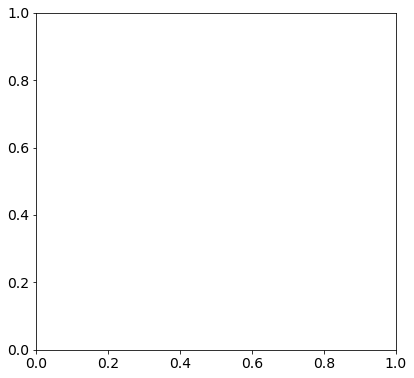

In [45]:
fig2 = plt.figure(constrained_layout=True, figsize=(16,10))
spec2 = gridspec.GridSpec(ncols=3, nrows=2, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
# f2_ax2 = fig2.add_subplot(spec2[0, 1])

axes = [f2_ax1]

nps_x = [95,96,97,98,99,100]
for i in range(1):
    # NSL
    nsl_acc, nsl_err = get_nsl_high_results('softmax', datasets[i])
    axes[i].plot(nps_x, nsl_acc, label = "NSL Softmax 320 examples", color="b", linestyle='-.')
    axes[i].errorbar(nps_x, nsl_acc, yerr=nsl_err, color="b", capsize=7,linestyle='-.')
    
    nsl_acc, nsl_err = get_nsl_high_results('edl_gen', datasets[i])
    axes[i].plot(nps_x, nsl_acc, label = "NSL EDL-GEN 320 examples", color="k", linestyle='-.')
    axes[i].errorbar(nps_x, nsl_acc, yerr=nsl_err, color="k", capsize=5,linestyle='-.')
    
    # Random Forest Small
    rf_acc, rf_err = get_baseline_high_results('rf', datasets[i])
    axes[i].plot(nps_x, rf_acc, label = "Baseline RF 320 examples", color="r", linestyle=':')
    axes[i].errorbar(nps_x, rf_acc, yerr=rf_err, color="r", capsize=5, linestyle=':')
    
    # Random Forest Large
    rf_acc, rf_err = get_baseline_high_results('rf', datasets[i], data_size='large')
    axes[i].plot(nps_x, rf_acc, label = "Baseline RF 32,000 examples", color="darkorange", linestyle=':')
    axes[i].errorbar(nps_x, rf_acc, yerr=rf_err, color="darkorange", capsize=5, linestyle=':')
    
    # CNN LSTM Small
    fcn_acc, fcn_err = get_baseline_high_results('cnn_lstm', datasets[i])
    axes[i].plot(nps_x, fcn_acc, label = "Baseline CNN-LSTM 320 examples", color="g", linestyle=':')
    axes[i].errorbar(nps_x, fcn_acc, yerr=fcn_err, color="g", capsize=5, linestyle=':')
    
    # CNN LSTM Large
    fcn_acc, fcn_err = get_baseline_high_results('cnn_lstm', datasets[i], data_size='large')
    axes[i].plot(nps_x, fcn_acc, label = "Baseline CNN-LSTM 32,000 examples", color="darkcyan", linestyle=':')
    axes[i].errorbar(nps_x, fcn_acc, yerr=fcn_err, color="darkcyan", capsize=5, linestyle=':')
    
    # RF Background Knowledge - same row, same col, same block predicates
    rf_acc, rf_err = get_baseline_high_results('rf_with_knowledge', datasets[i], data_size='small')
    axes[i].plot(nps_x, rf_acc, label = "Baseline RF (with knowledge) 320 examples", color="purple", linestyle=':')
    axes[i].errorbar(nps_x, rf_acc, yerr=rf_err, color="purple", capsize=5, linestyle=':')
    
#     # RF Background Knowledge 2 - Encoding row,col,block IDs
#     rf_acc, rf_err = get_baseline_results('rf_with_knowledge_2', datasets[i], data_size='small')
#     axes[i].plot(nps_x, rf_acc, label = "Baseline RF (with knowledge 2) 320 examples", color="tab:orange", linestyle=':')
#     axes[i].errorbar(nps_x, rf_acc, yerr=rf_err, color="tab:orange", capsize=5, linestyle=':')
    
    # Twin Axes to denote pct symbolic perturbations
#     pct_symbolic_perturbs_softmax = get_pct_symbolic_perturbs('softmax', datasets[i])
#     pct_symbolic_perturbs_edl_gen = get_pct_symbolic_perturbs('edl_gen', datasets[i])
#     ax2 = axes[i].twiny()
    
    axes[i].set_xticks(nps_x)
    #axes[i].set_yticks(np.arange(0.45,1.01,0.05))
    axes[i].set_xlabel('Training ex. subject to distributional shift (%)', fontsize=FONT_SIZE)
    axes[i].set_ylabel('Structured test set accuracy', fontsize=FONT_SIZE)
#     axes[i].set_title(datasets[i])
    axes[i].grid(True)
    
    
#     ax2.set_xticks(nps_x)
#     ax2.set_xticklabels(pct_symbolic_perturbs_softmax)
#     ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
#     ax2.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
#     ax2.spines['bottom'].set_position(('outward', 45))
#     ax2.set_xlabel('ILP ex. with a non-matching ctx/label: Softmax (%)', fontsize=FONT_SIZE)
#     ax2.set_xlim(axes[i].get_xlim())
    
#     ax3 = axes[i].twiny()
#     ax3.set_xticks(nps_x)
#     ax3.set_xticklabels(pct_symbolic_perturbs_edl_gen)
#     ax3.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
#     ax3.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
#     ax3.spines['bottom'].set_position(('outward', 90))
#     ax3.set_xlabel('ILP ex. with a non-matching ctx/label: EDL-GEN (%)', fontsize=FONT_SIZE)
#     ax3.set_xlim(axes[i].get_xlim())

    

    
# Set legend
# f2_ax2.legend(*axes[0].get_legend_handles_labels(), loc='center')
# f2_ax2.get_xaxis().set_visible(False)
# f2_ax2.get_yaxis().set_visible(False)
# f2_ax2.set_title('Legend')
# plt.savefig('tmp.pdf', format='pdf', bbox_inches='tight')
# plt.legend()
plt.show()

# Unstructured Test Data - Accuracy

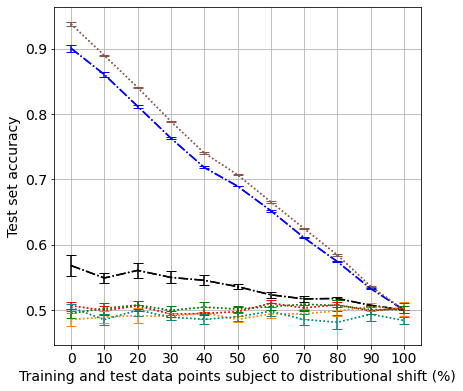

In [29]:
fig2 = plt.figure(constrained_layout=True, figsize=(16,10))
# fig3 = plt.figure(constrained_layout=True, figsize=(16,10))
spec2 = gridspec.GridSpec(ncols=3, nrows=2, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
# f3_ax1 = fig3.add_subplot(spec2[0, 0])

axes = [f2_ax1]

nps_x = [0]+noise_pcts
for i in range(1):
    # NSL
    nsl_acc, nsl_err = get_nsl_results('softmax', datasets[i], unstructured=True)
    axes[i].plot(nps_x, nsl_acc, label = "FF-NSL Softmax 320 examples", color="b", linestyle='-.')
    axes[i].errorbar(nps_x, nsl_acc, yerr=nsl_err, color="b", capsize=5,linestyle='-.')
    
    # EDL-GEN
    nsl_acc, nsl_err = get_nsl_results('edl_gen', datasets[i], unstructured=True)
    axes[i].plot(nps_x, nsl_acc, label = "FF-NSL EDL-GEN 320 examples", color="k", linestyle='-.')
    axes[i].errorbar(nps_x, nsl_acc, yerr=nsl_err, color="k", capsize=5,linestyle='-.')
    
    # Random Forest Small
    rf_acc, rf_err = get_baseline_results('rf', datasets[i], unstructured=True)
    axes[i].plot(nps_x, rf_acc, label = "Baseline RF 320 examples", color="r", linestyle=':')
    axes[i].errorbar(nps_x, rf_acc, yerr=rf_err, color="r", capsize=5, linestyle=':')
    
    # Random Forest Large
    rf_acc, rf_err = get_baseline_results('rf', datasets[i], data_size='large', unstructured=True)
    axes[i].plot(nps_x, rf_acc, label = "Baseline RF 32,000 examples", color="darkorange", linestyle=':')
    axes[i].errorbar(nps_x, rf_acc, yerr=rf_err, color="darkorange", capsize=5, linestyle=':')
    
    rf_acc, rf_err = get_baseline_results('rf_with_knowledge', datasets[i], data_size='small', unstructured=True)
    axes[i].plot(nps_x, rf_acc, label = "Baseline RF (with knowledge) 320 examples", color="tab:brown", linestyle=':')
    axes[i].errorbar(nps_x, rf_acc, yerr=rf_err, color="tab:brown", capsize=5, linestyle=':')
    
    # CNN-LSTM Small
    fcn_acc, fcn_err = get_baseline_results('cnn_lstm', datasets[i], unstructured=True)
    axes[i].plot(nps_x, fcn_acc, label = "Baseline CNN-LSTM 320 examples", color="g", linestyle=':')
    axes[i].errorbar(nps_x, fcn_acc, yerr=fcn_err, color="g", capsize=5, linestyle=':')
    
    # CNN-LSTM Large
    fcn_acc, fcn_err = get_baseline_results('cnn_lstm', datasets[i], data_size='large', unstructured=True)
    axes[i].plot(nps_x, fcn_acc, label = "Baseline CNN-LSTM 32,000 examples", color="darkcyan", linestyle=':')
    axes[i].errorbar(nps_x, fcn_acc, yerr=fcn_err, color="darkcyan", capsize=5, linestyle=':')
    
    # Twin Axes to denote pct symbolic perturbations
#     pct_symbolic_perturbs_softmax = get_pct_symbolic_perturbs('softmax', datasets[i])
#     pct_symbolic_perturbs_edl_gen = get_pct_symbolic_perturbs('edl_gen', datasets[i])
#     ax2 = axes[i].twiny()
    
    axes[i].set_xticks(nps_x)
    #axes[i].set_yticks(np.arange(0.45,1.01,0.05))
    axes[i].set_xlabel('Training and test data points subject to distributional shift (%)', fontsize=FONT_SIZE)
    axes[i].set_ylabel('Test set accuracy', fontsize=FONT_SIZE)
#     axes[i].set_title(datasets[i])
    axes[i].grid(True)
    
    
#     ax2.set_xticks(nps_x)
#     ax2.set_xticklabels(pct_symbolic_perturbs_softmax)
#     ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
#     ax2.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
#     ax2.spines['bottom'].set_position(('outward', 40))
#     ax2.set_xlabel('ILP examples with an incorrect label: Softmax (%)')
#     ax2.set_xlim(axes[i].get_xlim())
    
#     ax3 = axes[i].twiny()
#     ax3.set_xticks(nps_x)
#     ax3.set_xticklabels(pct_symbolic_perturbs_edl_gen)
#     ax3.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
#     ax3.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
#     ax3.spines['bottom'].set_position(('outward', 80))
#     ax3.set_xlabel('ILP examples with an incorrect label: EDL-GEN (%)')
#     ax3.set_xlim(axes[i].get_xlim())

    
# Set legend
# f3_ax1.legend(*axes[0].get_legend_handles_labels(), loc='center')
# f3_ax1.get_xaxis().set_visible(False)
# f3_ax1.get_yaxis().set_visible(False)
# f3_ax1.axis("off")

# f3_ax1.set_title('Legend')
#plt.savefig('sudoku_legend.pdf', format='pdf', bbox_inches='tight')
plt.savefig('sudoku_9x9_unstructured_test_data_accuracy_results.pdf', format='pdf', bbox_inches='tight')
plt.show()

# Unstructured test data without problog

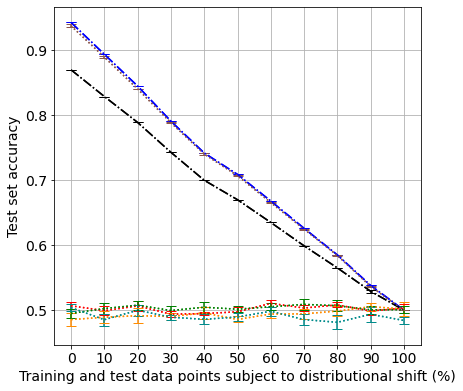

In [32]:
fig2 = plt.figure(constrained_layout=True, figsize=(16,10))
# fig3 = plt.figure(constrained_layout=True, figsize=(16,10))
spec2 = gridspec.GridSpec(ncols=3, nrows=2, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
# f3_ax1 = fig3.add_subplot(spec2[0, 0])

axes = [f2_ax1]

nps_x = [0]+noise_pcts
for i in range(1):
    # NSL
    nsl_acc, nsl_err = get_nsl_results('softmax', datasets[i], unstructured=True, without_problog=True)
    axes[i].plot(nps_x, nsl_acc, label = "FF-NSL Softmax 320 examples", color="b", linestyle='-.')
    axes[i].errorbar(nps_x, nsl_acc, yerr=nsl_err, color="b", capsize=5,linestyle='-.')
    
    # EDL-GEN
    nsl_acc, nsl_err = get_nsl_results('edl_gen', datasets[i], unstructured=True, without_problog=True)
    axes[i].plot(nps_x, nsl_acc, label = "FF-NSL EDL-GEN 320 examples", color="k", linestyle='-.')
    axes[i].errorbar(nps_x, nsl_acc, yerr=nsl_err, color="k", capsize=5,linestyle='-.')
    
    # Random Forest Small
    rf_acc, rf_err = get_baseline_results('rf', datasets[i], unstructured=True)
    axes[i].plot(nps_x, rf_acc, label = "Baseline RF 320 examples", color="r", linestyle=':')
    axes[i].errorbar(nps_x, rf_acc, yerr=rf_err, color="r", capsize=5, linestyle=':')
    
    # Random Forest Large
    rf_acc, rf_err = get_baseline_results('rf', datasets[i], data_size='large', unstructured=True)
    axes[i].plot(nps_x, rf_acc, label = "Baseline RF 32,000 examples", color="darkorange", linestyle=':')
    axes[i].errorbar(nps_x, rf_acc, yerr=rf_err, color="darkorange", capsize=5, linestyle=':')
    
    rf_acc, rf_err = get_baseline_results('rf_with_knowledge', datasets[i], data_size='small', unstructured=True)
    axes[i].plot(nps_x, rf_acc, label = "Baseline RF (with knowledge) 320 examples", color="tab:brown", linestyle=':')
    axes[i].errorbar(nps_x, rf_acc, yerr=rf_err, color="tab:brown", capsize=5, linestyle=':')
    
    # CNN-LSTM Small
    fcn_acc, fcn_err = get_baseline_results('cnn_lstm', datasets[i], unstructured=True)
    axes[i].plot(nps_x, fcn_acc, label = "Baseline CNN-LSTM 320 examples", color="g", linestyle=':')
    axes[i].errorbar(nps_x, fcn_acc, yerr=fcn_err, color="g", capsize=5, linestyle=':')
    
    # CNN-LSTM Large
    fcn_acc, fcn_err = get_baseline_results('cnn_lstm', datasets[i], data_size='large', unstructured=True)
    axes[i].plot(nps_x, fcn_acc, label = "Baseline CNN-LSTM 32,000 examples", color="darkcyan", linestyle=':')
    axes[i].errorbar(nps_x, fcn_acc, yerr=fcn_err, color="darkcyan", capsize=5, linestyle=':')
    
    axes[i].set_xticks(nps_x)
    axes[i].set_xlabel('Training and test data points subject to distributional shift (%)', fontsize=FONT_SIZE)
    axes[i].set_ylabel('Test set accuracy', fontsize=FONT_SIZE)
    axes[i].grid(True)

plt.savefig('sudoku_9x9_unstructured_test_data_accuracy_without_problog_results.pdf', format='pdf', bbox_inches='tight')
plt.show()

# 95-100%

ValueError: x and y must have same first dimension, but have shapes (6,) and (1,)

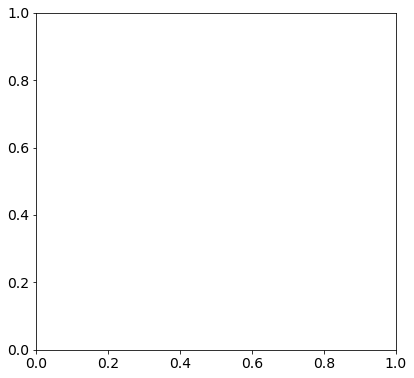

In [50]:
fig2 = plt.figure(constrained_layout=True, figsize=(16,10))
# fig3 = plt.figure(constrained_layout=True, figsize=(16,10))
spec2 = gridspec.GridSpec(ncols=3, nrows=2, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
# f3_ax1 = fig3.add_subplot(spec2[0, 0])

axes = [f2_ax1]

# nps_x = [0]+noise_pcts
nps_x = [95,96,97,98,99,100]
for i in range(1):
    # NSL
    nsl_acc, nsl_err = get_nsl_high_results('softmax', datasets[i], unstructured=True)
    axes[i].plot(nps_x, nsl_acc, label = "FF-NSL Softmax 320 examples", color="b", linestyle='-.')
    axes[i].errorbar(nps_x, nsl_acc, yerr=nsl_err, color="b", capsize=5,linestyle='-.')
    
    # EDL-GEN
    nsl_acc, nsl_err = get_nsl_high_results('edl_gen', datasets[i], unstructured=True)
    axes[i].plot(nps_x, nsl_acc, label = "FF-NSL EDL-GEN 320 examples", color="k", linestyle='-.')
    axes[i].errorbar(nps_x, nsl_acc, yerr=nsl_err, color="k", capsize=5,linestyle='-.')
    
    # Random Forest Small
    rf_acc, rf_err = get_baseline_high_results('rf', datasets[i], unstructured=True)
    axes[i].plot(nps_x, rf_acc, label = "Baseline RF 320 examples", color="r", linestyle=':')
    axes[i].errorbar(nps_x, rf_acc, yerr=rf_err, color="r", capsize=5, linestyle=':')
    
    # Random Forest Large
    rf_acc, rf_err = get_baseline_high_results('rf', datasets[i], data_size='large', unstructured=True)
    axes[i].plot(nps_x, rf_acc, label = "Baseline RF 32,000 examples", color="darkorange", linestyle=':')
    axes[i].errorbar(nps_x, rf_acc, yerr=rf_err, color="darkorange", capsize=5, linestyle=':')
    
    rf_acc, rf_err = get_baseline_high_results('rf_with_knowledge', datasets[i], unstructured=True)
    axes[i].plot(nps_x, rf_acc, label = "Baseline RF 320 examples", color="purple", linestyle=':')
    axes[i].errorbar(nps_x, rf_acc, yerr=rf_err, color="purple", capsize=5, linestyle=':')
    
    # CNN-LSTM Small
    fcn_acc, fcn_err = get_baseline_high_results('cnn_lstm', datasets[i], unstructured=True)
    axes[i].plot(nps_x, fcn_acc, label = "Baseline CNN-LSTM 320 examples", color="g", linestyle=':')
    axes[i].errorbar(nps_x, fcn_acc, yerr=fcn_err, color="g", capsize=5, linestyle=':')
    
    # CNN-LSTM Large
    fcn_acc, fcn_err = get_baseline_high_results('cnn_lstm', datasets[i], data_size='large', unstructured=True)
    axes[i].plot(nps_x, fcn_acc, label = "Baseline CNN-LSTM 32,000 examples", color="darkcyan", linestyle=':')
    axes[i].errorbar(nps_x, fcn_acc, yerr=fcn_err, color="darkcyan", capsize=5, linestyle=':')
    
    # Twin Axes to denote pct symbolic perturbations
    pct_symbolic_perturbs_softmax = get_pct_symbolic_perturbs('softmax', datasets[i])
    pct_symbolic_perturbs_edl_gen = get_pct_symbolic_perturbs('edl_gen', datasets[i])
#     ax2 = axes[i].twiny()
    
    axes[i].set_xticks(nps_x)
    #axes[i].set_yticks(np.arange(0.45,1.01,0.05))
    axes[i].set_xlabel('Training and test examples subject to distributional shift (%)', fontsize=FONT_SIZE)
    axes[i].set_ylabel('Unstructured test set accuracy', fontsize=FONT_SIZE)
#     axes[i].set_title(datasets[i])
    axes[i].grid(True)
    
plt.show()

# Unstructured Test Data Brier Score

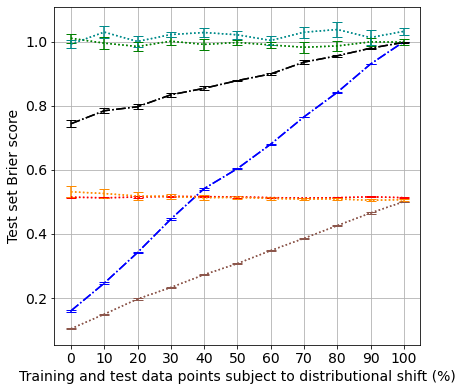

In [30]:
fig2 = plt.figure(constrained_layout=True, figsize=(16,10))
spec2 = gridspec.GridSpec(ncols=3, nrows=2, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
# f2_ax2 = fig2.add_subplot(spec2[0, 1])

axes = [f2_ax1]

nps_x = [0]+noise_pcts
for i in range(1):
    # NSL
    nsl_acc, nsl_err = get_nsl_results('softmax', datasets[i], unstructured=True, unstruc_acc='brier_score')
    axes[i].plot(nps_x, nsl_acc, label = "NSL Softmax 320 examples", color="b", linestyle='-.')
    axes[i].errorbar(nps_x, nsl_acc, yerr=nsl_err, color="b", capsize=5,linestyle='-.')
    
    nsl_acc, nsl_err = get_nsl_results('edl_gen', datasets[i], unstructured=True, unstruc_acc='brier_score')
    axes[i].plot(nps_x, nsl_acc, label = "NSL EDL-GEN 320 examples", color="k", linestyle='-.')
    axes[i].errorbar(nps_x, nsl_acc, yerr=nsl_err, color="k", capsize=5,linestyle='-.')
    
    # Random Forest Small
    rf_acc, rf_err = get_baseline_results('rf', datasets[i], unstructured=True, unstruc_acc='unstructured_test_brier_score')
    axes[i].plot(nps_x, rf_acc, label = "Baseline RF 320 examples", color="r", linestyle=':')
    axes[i].errorbar(nps_x, rf_acc, yerr=rf_err, color="r", capsize=5, linestyle=':')
    
    # Random Forest Large
    rf_acc, rf_err = get_baseline_results('rf', datasets[i], data_size='large', unstructured=True, unstruc_acc='unstructured_test_brier_score')
    axes[i].plot(nps_x, rf_acc, label = "Baseline RF 32,000 examples", color="darkorange", linestyle=':')
    axes[i].errorbar(nps_x, rf_acc, yerr=rf_err, color="darkorange", capsize=5, linestyle=':')
    
    rf_acc, rf_err = get_baseline_results('rf_with_knowledge', datasets[i], unstructured=True, unstruc_acc='unstructured_test_brier_score')
    axes[i].plot(nps_x, rf_acc, label = "Baseline RF (with knowledge) 320 examples", color="tab:brown", linestyle=':')
    axes[i].errorbar(nps_x, rf_acc, yerr=rf_err, color="tab:brown", capsize=5, linestyle=':')
    
    # CNN LSTM Small
    fcn_acc, fcn_err = get_baseline_results('cnn_lstm', datasets[i], unstructured=True, unstruc_acc='unstructured_test_brier_score')
    axes[i].plot(nps_x, fcn_acc, label = "Baseline CNN-LSTM 320 examples", color="g", linestyle=':')
    axes[i].errorbar(nps_x, fcn_acc, yerr=fcn_err, color="g", capsize=5, linestyle=':')
    
    # CNN LSTM Large
    fcn_acc, fcn_err = get_baseline_results('cnn_lstm', datasets[i], data_size='large', unstructured=True, unstruc_acc='unstructured_test_brier_score')
    axes[i].plot(nps_x, fcn_acc, label = "Baseline CNN-LSTM 32,000 examples", color="darkcyan", linestyle=':')
    axes[i].errorbar(nps_x, fcn_acc, yerr=fcn_err, color="darkcyan", capsize=5, linestyle=':')
    
    # Twin Axes to denote pct symbolic perturbations
#     pct_symbolic_perturbs_softmax = get_pct_symbolic_perturbs('softmax', datasets[i])
#     pct_symbolic_perturbs_edl_gen = get_pct_symbolic_perturbs('edl_gen', datasets[i])
#     ax2 = axes[i].twiny()
    
    axes[i].set_xticks(nps_x)
    #axes[i].set_yticks(np.arange(0.45,1.01,0.05))
    axes[i].set_xlabel('Training and test data points subject to distributional shift (%)', fontsize=FONT_SIZE)
    axes[i].set_ylabel('Test set Brier score', fontsize=FONT_SIZE)
#     axes[i].set_title(datasets[i])
    axes[i].grid(True)
    
    
#     ax2.set_xticks(nps_x)
#     ax2.set_xticklabels(pct_symbolic_perturbs_softmax)
#     ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
#     ax2.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
#     ax2.spines['bottom'].set_position(('outward', 40))
#     ax2.set_xlabel('ILP examples with an incorrect label: Softmax (%)')
#     ax2.set_xlim(axes[i].get_xlim())
    
#     ax3 = axes[i].twiny()
#     ax3.set_xticks(nps_x)
#     ax3.set_xticklabels(pct_symbolic_perturbs_edl_gen)
#     ax3.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
#     ax3.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
#     ax3.spines['bottom'].set_position(('outward', 80))
#     ax3.set_xlabel('ILP examples with an incorrect label: EDL-GEN (%)')
#     ax3.set_xlim(axes[i].get_xlim())

    
# Set legend
# f2_ax2.legend(*axes[0].get_legend_handles_labels(), loc='center')
# f2_ax2.get_xaxis().set_visible(False)
# f2_ax2.get_yaxis().set_visible(False)
# f2_ax2.set_title('Legend')
plt.savefig('sudoku_9x9_unstructured_test_data_brier_score_results.pdf', format='pdf', bbox_inches='tight')
plt.show()

# 95-100%

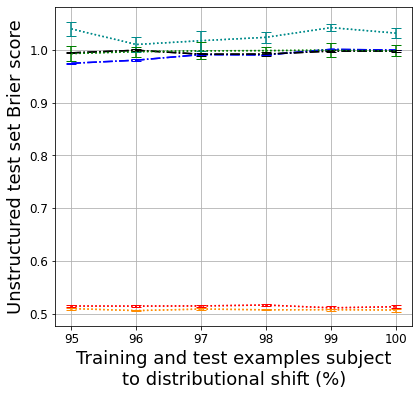

In [17]:
fig2 = plt.figure(constrained_layout=True, figsize=(16,10))
spec2 = gridspec.GridSpec(ncols=3, nrows=2, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
# f2_ax2 = fig2.add_subplot(spec2[0, 1])

axes = [f2_ax1]

# nps_x = [0]+noise_pcts
nps_x = [95,96,97,98,99,100]
for i in range(1):
    # NSL
    nsl_acc, nsl_err = get_nsl_high_results('softmax', datasets[i], unstructured=True, unstruc_acc='brier_score')
    axes[i].plot(nps_x, nsl_acc, label = "NSL Softmax 320 examples", color="b", linestyle='-.')
    axes[i].errorbar(nps_x, nsl_acc, yerr=nsl_err, color="b", capsize=5,linestyle='-.')
    
    nsl_acc, nsl_err = get_nsl_high_results('edl_gen', datasets[i], unstructured=True, unstruc_acc='brier_score')
    axes[i].plot(nps_x, nsl_acc, label = "NSL EDL-GEN 320 examples", color="k", linestyle='-.')
    axes[i].errorbar(nps_x, nsl_acc, yerr=nsl_err, color="k", capsize=5,linestyle='-.')
    
    # Random Forest Small
    rf_acc, rf_err = get_baseline_high_results('rf', datasets[i], unstructured=True, unstruc_acc='unstructured_test_brier_score')
    axes[i].plot(nps_x, rf_acc, label = "Baseline RF 320 examples", color="r", linestyle=':')
    axes[i].errorbar(nps_x, rf_acc, yerr=rf_err, color="r", capsize=5, linestyle=':')
    
    # Random Forest Large
    rf_acc, rf_err = get_baseline_high_results('rf', datasets[i], data_size='large', unstructured=True, unstruc_acc='unstructured_test_brier_score')
    axes[i].plot(nps_x, rf_acc, label = "Baseline RF 32,000 examples", color="darkorange", linestyle=':')
    axes[i].errorbar(nps_x, rf_acc, yerr=rf_err, color="darkorange", capsize=5, linestyle=':')
    
    # CNN LSTM Small
    fcn_acc, fcn_err = get_baseline_high_results('cnn_lstm', datasets[i], unstructured=True, unstruc_acc='unstructured_test_brier_score')
    axes[i].plot(nps_x, fcn_acc, label = "Baseline CNN-LSTM 320 examples", color="g", linestyle=':')
    axes[i].errorbar(nps_x, fcn_acc, yerr=fcn_err, color="g", capsize=5, linestyle=':')
    
    # CNN LSTM Large
    fcn_acc, fcn_err = get_baseline_high_results('cnn_lstm', datasets[i], data_size='large', unstructured=True, unstruc_acc='unstructured_test_brier_score')
    axes[i].plot(nps_x, fcn_acc, label = "Baseline CNN-LSTM 32,000 examples", color="darkcyan", linestyle=':')
    axes[i].errorbar(nps_x, fcn_acc, yerr=fcn_err, color="darkcyan", capsize=5, linestyle=':')
    
    # Twin Axes to denote pct symbolic perturbations
    pct_symbolic_perturbs_softmax = get_pct_symbolic_perturbs('softmax', datasets[i])
    pct_symbolic_perturbs_edl_gen = get_pct_symbolic_perturbs('edl_gen', datasets[i])
#     ax2 = axes[i].twiny()
    
    axes[i].set_xticks(nps_x)
    #axes[i].set_yticks(np.arange(0.45,1.01,0.05))
    axes[i].set_xlabel('Training and test examples subject\nto distributional shift (%)', fontsize=FONT_SIZE)
    axes[i].set_ylabel('Unstructured test set Brier score', fontsize=FONT_SIZE)
#     axes[i].set_title(datasets[i])
    axes[i].grid(True)
    
plt.show()

# Unstructured Test Data ROC Curve

In [9]:
def get_roc_results(net_type, noise_pct, split):
    # need to build array of results for noise pcts 
    if noise_pct == 0:
        d = 'standard'
    else:
        d = 'rotated'
    res = json.loads(open('../nsl/unstructured_test_data/'+net_type+'/'+d+'_roc.json').read())
    this_res = res['noise_pct_'+str(noise_pct)]['split_'+str(split)]
    details = {
        'tp': this_res['tp'],
        'tn': this_res['tn'],
        'fp': this_res['fp'],
        'fn': this_res['fn']
    }
    return this_res['y_true'], this_res['y_prob'], details

In [10]:
NOISE_PCT = 10
SPLIT = 1
softmax_true, softmax_prob, s_details = get_roc_results('softmax', NOISE_PCT, SPLIT)
edl_gen_true, edl_gen_prob, e_details = get_roc_results('edl_gen', NOISE_PCT, SPLIT)

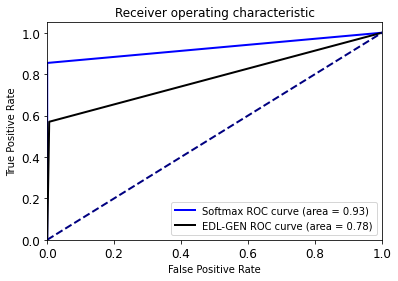

Softmax: 
{'tp': 427, 'tn': 500, 'fp': 0, 'fn': 73}
EDL-GEN: 
{'tp': 285, 'tn': 497, 'fp': 3, 'fn': 215}


In [11]:
s_fpr, s_tpr, s_thresholds = roc_curve(softmax_true, softmax_prob)
s_roc_auc = auc(s_fpr, s_tpr)

e_fpr, e_tpr, e_thresholds = roc_curve(edl_gen_true, edl_gen_prob)
e_roc_auc = auc(e_fpr, e_tpr)
plt.figure()
lw = 2
plt.plot(s_fpr, s_tpr, color='b',
         lw=lw, label='Softmax ROC curve (area = %0.2f)' % s_roc_auc)
plt.plot(e_fpr, e_tpr, color='k',
         lw=lw, label='EDL-GEN ROC curve (area = %0.2f)' % e_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

print('Softmax: ')
print(s_details)
print('EDL-GEN: ')
print(e_details)

# Comparison with constant penalty

In [30]:
# Over 20 runs
def get_nsl_extra_comparison_results(net_type, dataset):        
    # need to build array of results for noise pcts
    acc = []
    acc_stds = []
    struc_unstruc = 'structured_test_data'
    acc_metric = 'accuracy'
    
    # other noise pcts
    np_res_extra = json.loads(open('../nsl/'+struc_unstruc+'/'+net_type+'/'+dataset+'_extra.json').read()) 
    np_res = json.loads(open('../nsl/'+struc_unstruc+'/'+net_type+'/'+dataset+'.json').read()) 
    noise_pcts = [10,20,30,40,50,60,70,80,90,95,96,97,98,99,100]
    for n in noise_pcts:
        if n > 90 and n < 100:
            raw = np_res['noise_pct_'+str(n)][acc_metric]['raw'] + np_res_extra['noise_pct_'+str(n)][acc_metric]['raw']
            acc.append(np.mean(raw))
            acc_stds.append(stats.sem(raw))
    return acc, acc_stds

In [12]:
# Over 50 runs
def get_nsl_extra_comparison_results_50_repeats(net_type, dataset):        
    # need to build array of results for noise pcts
    acc = []
    acc_stds = []
    struc_unstruc = 'structured_test_data'
    acc_metric = 'accuracy'
    
    # other noise pcts
    np_res = json.loads(open('../nsl/'+struc_unstruc+'/'+net_type+'/'+dataset+'_more_repeats.json').read())
    noise_pcts = [10,20,30,40,50,60,70,80,90,95,96,97,98,99,100]
    for n in noise_pcts:
        if n > 90 and n < 100:
            raw = np_res['noise_pct_'+str(n)][acc_metric]['raw']
            acc.append(np.mean(raw))
            acc_stds.append(stats.sem(raw))
    return acc, acc_stds

# Full 5 repeats

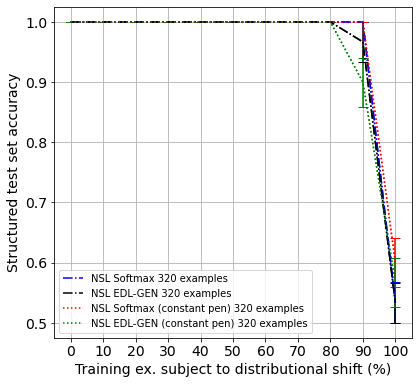

In [32]:
fig2 = plt.figure(constrained_layout=True, figsize=(16,10))
spec2 = gridspec.GridSpec(ncols=3, nrows=2, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
# f2_ax2 = fig2.add_subplot(spec2[0, 1])

axes = [f2_ax1]

nps_x = [0]+noise_pcts
for i in range(1):
    # NSL
    nsl_acc, nsl_err = get_nsl_results('softmax', datasets[i])
    axes[i].plot(nps_x, nsl_acc, label = "NSL Softmax 320 examples", color="b", linestyle='-.')
    axes[i].errorbar(nps_x, nsl_acc, yerr=nsl_err, color="b", capsize=5,linestyle='-.')
    
    nsl_acc, nsl_err = get_nsl_results('edl_gen', datasets[i])
    axes[i].plot(nps_x, nsl_acc, label = "NSL EDL-GEN 320 examples", color="k", linestyle='-.')
    axes[i].errorbar(nps_x, nsl_acc, yerr=nsl_err, color="k", capsize=5,linestyle='-.')
    
    # NSL Constant
    nsl_acc, nsl_err = get_nsl_results('constant_softmax', datasets[i])
    axes[i].plot(nps_x, nsl_acc, label = "NSL Softmax (constant pen) 320 examples", color="r", linestyle=':')
    axes[i].errorbar(nps_x, nsl_acc, yerr=nsl_err, color="r", capsize=5,linestyle=':')
    
    nsl_acc, nsl_err = get_nsl_results('constant_edl_gen', datasets[i])
    axes[i].plot(nps_x, nsl_acc, label = "NSL EDL-GEN (constant pen) 320 examples", color="g", linestyle=':')
    axes[i].errorbar(nps_x, nsl_acc, yerr=nsl_err, color="g", capsize=5,linestyle=':')
    
    
    axes[i].set_xticks(nps_x)
    #axes[i].set_yticks(np.arange(0.45,1.01,0.05))
    axes[i].set_xlabel('Training ex. subject to distributional shift (%)', fontsize=FONT_SIZE)
    axes[i].set_ylabel('Structured test set accuracy', fontsize=FONT_SIZE)
#     axes[i].set_title(datasets[i])
    axes[i].grid(True)
plt.legend()
plt.show()

# 95-100% 5 repeats

ValueError: x and y must have same first dimension, but have shapes (6,) and (1,)

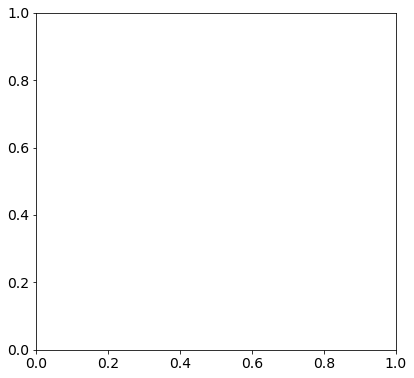

In [33]:
fig2 = plt.figure(constrained_layout=True, figsize=(16,10))
spec2 = gridspec.GridSpec(ncols=3, nrows=2, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
# f2_ax2 = fig2.add_subplot(spec2[0, 1])

axes = [f2_ax1]

nps_x = [95,96,97,98,99,100]
for i in range(1):
    # NSL
    nsl_acc, nsl_err = get_nsl_high_results('softmax', datasets[i])
    axes[i].plot(nps_x, nsl_acc, label = "NSL Softmax 320 examples", color="b", linestyle='-.')
    axes[i].errorbar(nps_x, nsl_acc, yerr=nsl_err, color="b", capsize=7,linestyle='-.')
    
    nsl_acc, nsl_err = get_nsl_high_results('edl_gen', datasets[i])
    axes[i].plot(nps_x, nsl_acc, label = "NSL EDL-GEN 320 examples", color="k", linestyle='-.')
    axes[i].errorbar(nps_x, nsl_acc, yerr=nsl_err, color="k", capsize=7,linestyle='-.')
    
    # NSL Constant
    nsl_acc, nsl_err = get_nsl_high_results('constant_softmax', datasets[i])
    axes[i].plot(nps_x, nsl_acc, label = "NSL Softmax (constant pen) 320 examples", color="r", linestyle=':')
    axes[i].errorbar(nps_x, nsl_acc, yerr=nsl_err, color="r", capsize=5,linestyle=':')
    
    nsl_acc, nsl_err = get_nsl_high_results('constant_edl_gen', datasets[i])
    axes[i].plot(nps_x, nsl_acc, label = "NSL EDL-GEN (constant pen) 320 examples", color="g", linestyle=':')
    axes[i].errorbar(nps_x, nsl_acc, yerr=nsl_err, color="g", capsize=5,linestyle=':')
    

    
    # Twin Axes to denote pct symbolic perturbations
#     pct_symbolic_perturbs_softmax = get_pct_symbolic_perturbs('softmax', datasets[i])
#     pct_symbolic_perturbs_edl_gen = get_pct_symbolic_perturbs('edl_gen', datasets[i])
#     ax2 = axes[i].twiny()
    
    axes[i].set_xticks(nps_x)
    #axes[i].set_yticks(np.arange(0.45,1.01,0.05))
    axes[i].set_xlabel('Training ex. subject to distributional shift (%)', fontsize=FONT_SIZE)
    axes[i].set_ylabel('Structured test set accuracy', fontsize=FONT_SIZE)
#     axes[i].set_title(datasets[i])
    axes[i].grid(True)
    
plt.legend()
plt.show()

# 95-99% 20 repeats

ValueError: x and y must have same first dimension, but have shapes (5,) and (0,)

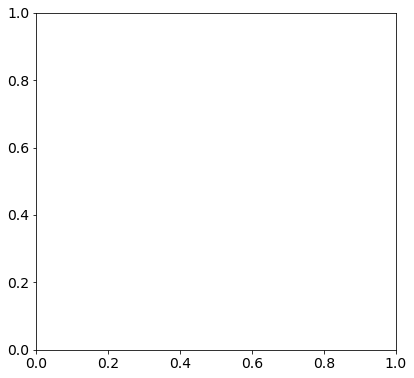

In [29]:
fig2 = plt.figure(constrained_layout=True, figsize=(16,10))
spec2 = gridspec.GridSpec(ncols=3, nrows=2, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
# f2_ax2 = fig2.add_subplot(spec2[0, 1])

axes = [f2_ax1]

nps_x = [95,96,97,98,99]
for i in range(1):
    # NSL
    nsl_acc, nsl_err = get_nsl_extra_comparison_results('softmax', datasets[i])
    axes[i].plot(nps_x, nsl_acc, label = "NSL Softmax 320 examples", color="b", linestyle='-.')
    axes[i].errorbar(nps_x, nsl_acc, yerr=nsl_err, color="b", capsize=7,linestyle='-.')
    
    nsl_acc, nsl_err = get_nsl_extra_comparison_results('edl_gen', datasets[i])
    axes[i].plot(nps_x, nsl_acc, label = "NSL EDL-GEN 320 examples", color="k", linestyle='-.')
    axes[i].errorbar(nps_x, nsl_acc, yerr=nsl_err, color="k", capsize=7,linestyle='-.')
    
    # NSL Constant
    nsl_acc, nsl_err = get_nsl_extra_comparison_results('constant_softmax', datasets[i])
    axes[i].plot(nps_x, nsl_acc, label = "NSL Softmax (constant pen) 320 examples", color="r", linestyle=':')
    axes[i].errorbar(nps_x, nsl_acc, yerr=nsl_err, color="r", capsize=5,linestyle=':')
    
    nsl_acc, nsl_err = get_nsl_extra_comparison_results('constant_edl_gen', datasets[i])
    axes[i].plot(nps_x, nsl_acc, label = "NSL EDL-GEN (constant pen) 320 examples", color="g", linestyle=':')
    axes[i].errorbar(nps_x, nsl_acc, yerr=nsl_err, color="g", capsize=5,linestyle=':')
    
    
    axes[i].set_xticks(nps_x)
    #axes[i].set_yticks(np.arange(0.45,1.01,0.05))
    axes[i].set_xlabel('Training ex. subject to distributional shift (%)', fontsize=FONT_SIZE)
    axes[i].set_ylabel('Structured test set accuracy', fontsize=FONT_SIZE)
#     axes[i].set_title(datasets[i])
    axes[i].grid(True)
    
plt.legend()
plt.show()

# 95-99% 50 repeats

In [21]:
def get_pct_symbolic_perturbs_50_repeats(net_type, deck):
    def format_pct(x):
        return math.floor(x*100)
    pcts = []
    # get standard
    pct_symbolic_perturbs = json.loads(open('../mislabelled_example_analysis/'+net_type+'/'+deck+'.json').read())
    for n in [95,96,97,98,99]:
        pcts.append(format_pct(pct_symbolic_perturbs['noise_pct_'+str(n)]['pct_incorrect_examples']))
    return pcts

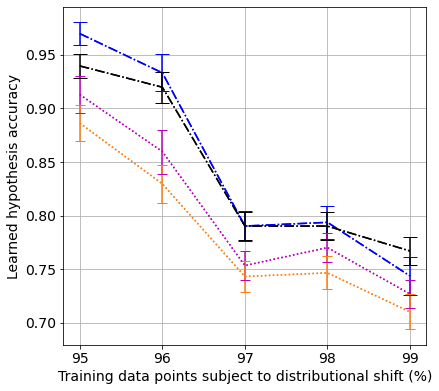

In [20]:
fig2 = plt.figure(constrained_layout=True, figsize=(16,10))
spec2 = gridspec.GridSpec(ncols=3, nrows=2, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
# f2_ax2 = fig2.add_subplot(spec2[0, 1])

axes = [f2_ax1]

nps_x = [95,96,97,98,99]
for i in range(1):
    # NSL
    nsl_acc, nsl_err = get_nsl_extra_comparison_results_50_repeats('softmax', datasets[i])
    axes[i].plot(nps_x, nsl_acc, label = "NSL Softmax 320 examples", color="b", linestyle='-.')
    axes[i].errorbar(nps_x, nsl_acc, yerr=nsl_err, color="b", capsize=7,linestyle='-.')
    
    nsl_acc, nsl_err = get_nsl_extra_comparison_results_50_repeats('edl_gen', datasets[i])
    axes[i].plot(nps_x, nsl_acc, label = "NSL EDL-GEN 320 examples", color="k", linestyle='-.')
    axes[i].errorbar(nps_x, nsl_acc, yerr=nsl_err, color="k", capsize=7,linestyle='-.')
    
    # NSL Constant
    nsl_acc, nsl_err = get_nsl_extra_comparison_results_50_repeats('constant_softmax', datasets[i])
    axes[i].plot(nps_x, nsl_acc, label = "NSL Softmax (constant pen) 320 examples", color="m", linestyle=':')
    axes[i].errorbar(nps_x, nsl_acc, yerr=nsl_err, color="m", capsize=5,linestyle=':')
    
    nsl_acc, nsl_err = get_nsl_extra_comparison_results_50_repeats('constant_edl_gen', datasets[i])
    axes[i].plot(nps_x, nsl_acc, label = "NSL EDL-GEN (constant pen) 320 examples", color="tab:orange", linestyle=':')
    axes[i].errorbar(nps_x, nsl_acc, yerr=nsl_err, color="tab:orange", capsize=5,linestyle=':')
    
    # Twin Axes to denote pct symbolic perturbations
#     pct_symbolic_perturbs_softmax = get_pct_symbolic_perturbs_50_repeats('softmax', datasets[i])
#     pct_symbolic_perturbs_edl_gen = get_pct_symbolic_perturbs_50_repeats('edl_gen', datasets[i])
#     ax2 = axes[i].twiny()
    
    axes[i].set_xticks(nps_x)
    #axes[i].set_yticks(np.arange(0.45,1.01,0.05))
    axes[i].set_xlabel('Training data points subject to distributional shift (%)', fontsize=FONT_SIZE)
    axes[i].set_ylabel('Learned hypothesis accuracy', fontsize=FONT_SIZE)
#     axes[i].set_title(datasets[i])
    axes[i].grid(True)
    
#     ax2.set_xticks(nps_x)
#     ax2.set_xticklabels(pct_symbolic_perturbs_softmax)
#     ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
#     ax2.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
#     ax2.spines['bottom'].set_position(('outward', 45))
#     ax2.set_xlabel('ILP ex. with a non-matching ctx/label: Softmax (%)', fontsize=FONT_SIZE)
#     ax2.set_xlim(axes[i].get_xlim())
    
#     ax3 = axes[i].twiny()
#     ax3.set_xticks(nps_x)
#     ax3.set_xticklabels(pct_symbolic_perturbs_edl_gen)
#     ax3.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
#     ax3.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
#     ax3.spines['bottom'].set_position(('outward', 90))
#     ax3.set_xlabel('ILP ex. with a non-matching ctx/label: EDL-GEN (%)', fontsize=FONT_SIZE)
#     ax3.set_xlim(axes[i].get_xlim())
    
# plt.legend()
plt.savefig('sudoku_9x9_structured_accuracy_95_100_results.pdf', format='pdf', bbox_inches='tight')
plt.show()